In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.isna().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.head(1)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


In [6]:
from sklearn.impute import SimpleImputer


In [7]:
mean_imputer = SimpleImputer(missing_values=np.nan,fill_value='mean')
mode_imputer = SimpleImputer(missing_values=np.nan,fill_value='most_frequent')

In [8]:
df['education'] = mode_imputer.fit_transform(df['education'].values.reshape(-1,1))


In [11]:
df['cigsPerDay'] = mode_imputer.fit_transform(df['cigsPerDay'].values.reshape(-1,1))


In [12]:
df['BPMeds'] = mode_imputer.fit_transform(df['BPMeds'].values.reshape(-1,1))


In [10]:
df['totChol'] = mode_imputer.fit_transform(df['totChol'].values.reshape(-1,1))


In [9]:
df['BMI'] = mode_imputer.fit_transform(df['BMI'].values.reshape(-1,1))


In [13]:
df['heartRate'] = mode_imputer.fit_transform(df['heartRate'].values.reshape(-1,1))


In [14]:
df['glucose'] = mode_imputer.fit_transform(df['glucose'].values.reshape(-1,1))

In [15]:
df.isna().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
x = df.drop(['education','TenYearCHD'],axis=1)


In [17]:
x
y = df['TenYearCHD']

In [18]:
y


0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [22]:
clf = LogisticRegression()


In [25]:
scl = StandardScaler()
x_train_scal = scl.fit_transform(x_train)
x_test_scal = scl.fit_transform(x_test)

clf.fit(x_train_scal,y_train)

y_prids = clf.predict(x_train_scal)
y_test_prids = clf.predict(x_test_scal)
y_prids

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score , recall_score ,precision_score ,confusion_matrix,ConfusionMatrixDisplay


In [27]:
accuracy_score(y_train,y_prids)


0.8542772861356932

In [28]:
accuracy_score(y_test,y_test_prids)


0.8596698113207547

In [29]:
recall_score(y_train,y_prids)


0.07915057915057915

In [30]:
recall_score(y_test,y_test_prids)


0.07936507936507936

In [31]:
precision_score(y_train,y_prids)


0.7068965517241379

In [32]:
precision_score(y_test,y_test_prids)


0.7692307692307693

In [33]:
confusion_matrix(y_train,y_prids)


array([[2855,   17],
       [ 477,   41]], dtype=int64)

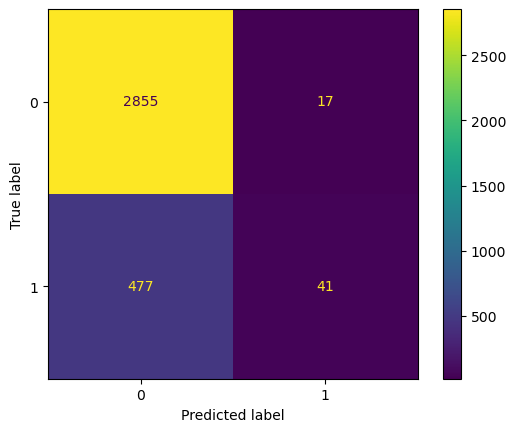

In [34]:
ConfusionMatrixDisplay(confusion_matrix(y_train,y_prids)).plot();
